In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Feature selection

### Missing value ratio

In [2]:
# Synthetic dataset with missing values
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_clusters_per_class=2,
    random_state=42,
)
df = pd.DataFrame(X, columns=[f"{i}" for i in range(1, 21)])

# Introduce missing values in random columns
np.random.seed(42)
for col in df.columns[:20]: 
    missing_fraction = np.random.uniform(0.1, 0.4) 
    missing_indices = df.sample(frac=missing_fraction).index
    df.loc[missing_indices, col] = np.nan


In [3]:
# Calculate the Missing Value Ratio for each feature
missing_ratio = df.isnull().mean()

In [4]:
# Drop features with more than 30% missing values
threshold = 0.3
features_to_keep = missing_ratio[missing_ratio < threshold].index
reduced_df = df[features_to_keep]
reduced_df

,1,3,4,5,6,7,10,11,12,15,17,18
0,1.470848,-0.591602,-0.728228,0.941690,1.065964,0.017832,-1.497093,-1.202672,-0.603968,-1.249523,0.416628,1.408208
1,4.513369,-1.140747,NaN,NaN,-0.497370,NaN,0.159837,0.133942,1.461499,0.538184,-4.532216,-0.081800
2,-2.355643,-1.603269,NaN,0.401483,0.717264,-0.859399,NaN,NaN,0.544434,NaN,NaN,NaN
3,-1.596198,1.772434,NaN,1.419409,-0.438525,0.281949,NaN,0.238566,-1.025051,-0.300713,2.893775,1.236697
4,2.840049,NaN,-1.594362,NaN,0.459637,NaN,NaN,NaN,4.176424,NaN,NaN,0.053489
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.952534,NaN,0.120452,3.539113,-0.556466,0.517210,-2.143993,1.221166,-2.233344,-2.239507,2.296884,0.438294
996,-3.434088,-0.726931,-1.787934,-3.247447,1.439954,1.075627,-6.569889,1.068642,2.058341,3.414485,0.744789,-3.919345
997,NaN,3.221682,2.878762,-3.854459,-1.862864,NaN,0.268957,-1.636302,0.306705,NaN,-0.107586,-0.789566
998,1.285071,-1.700678,NaN,-2.025566,NaN,0.261185,0.811538,-0.571903,-1.600277,0.982096,-4.929617,1.660500


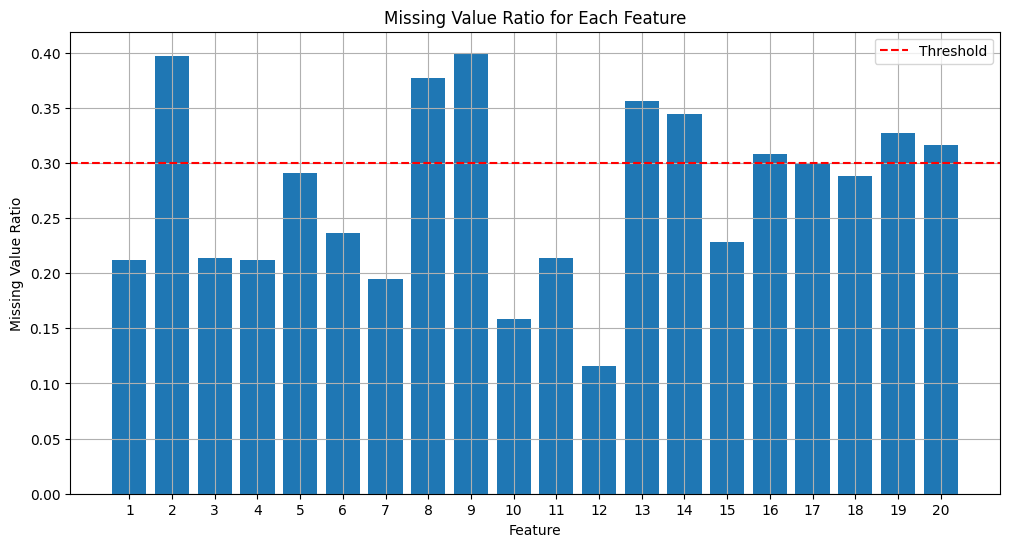

In [5]:
plt.figure(figsize=(12, 6))
plt.bar(missing_ratio.index, missing_ratio.values)
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.title("Missing Value Ratio for Each Feature")
plt.xlabel("Feature")
plt.ylabel("Missing Value Ratio")
plt.xticks(rotation=0)
plt.legend()
plt.grid()

### Low variance thresholding

In [6]:
from sklearn.feature_selection import VarianceThreshold

# Synthetic dataset with low and high variance features
np.random.seed(42)
n_samples = 1000

# Generate features
low_variance_feature = np.random.normal(0, 0.0001, n_samples)  # Very low variance
medium_variance_feature = np.random.normal(0, 0.1, n_samples)  # Medium variance
high_variance_feature = np.random.normal(0, 1, n_samples)      # High variance

df = pd.DataFrame({
    "Low Variance": low_variance_feature,
    "Medium Variance": medium_variance_feature,
    "High Variance": high_variance_feature
})

In [7]:
# Calculate variance of each feature
variances = df.var()

In [8]:

# Apply Variance Thresholding
threshold = 0.001
selector = VarianceThreshold(threshold=threshold)
df_reduced = selector.fit_transform(df)

# Get the names of features that were kept
selected_features = df.columns[selector.get_support()]

In [9]:
# Display variance of original features and selected features
variance_results = pd.DataFrame({
    "Feature": df.columns,
    "Variance": variances,
    "Selected": ["Yes" if feature in selected_features else "No" for feature in df.columns]
})
variance_results

,Feature,Variance,Selected
Low Variance,Low Variance,9.588639e-09,No
Medium Variance,Medium Variance,9.949152e-03,Yes
High Variance,High Variance,9.671823e-01,Yes


### Mutual information

In [10]:
from sklearn.feature_selection import mutual_info_classif

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,  # Only 10 features are informative
    n_redundant=5,
    random_state=42
)

feature_names = [f"{i}" for i in range(1, 21)]
df = pd.DataFrame(X, columns=feature_names)

In [11]:
# Mutual Information between each feature and the target variable
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores_series = pd.Series(mi_scores, index=feature_names)

In [12]:
# Sort the features by their Mutual Information scores
mi_scores_sorted = mi_scores_series.sort_values(ascending=False)

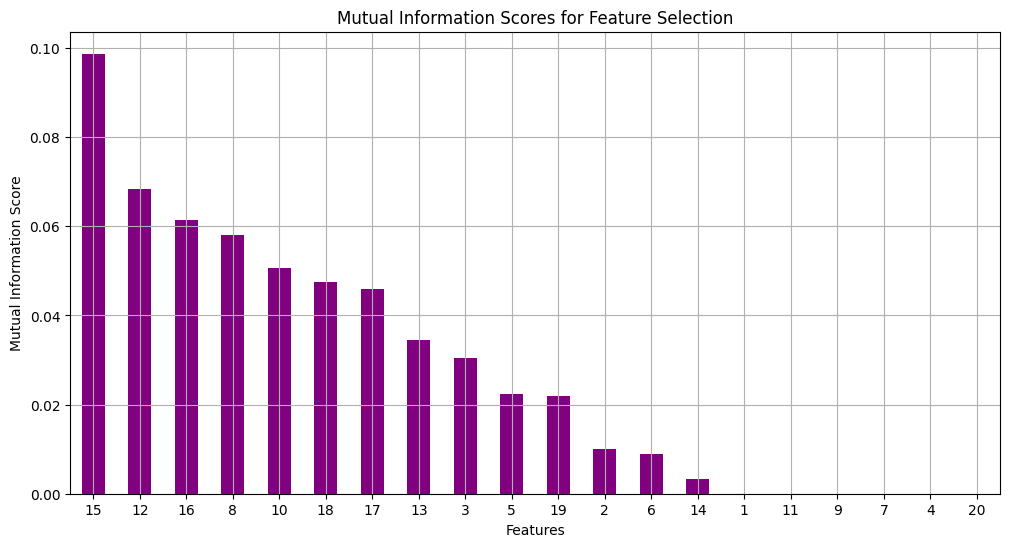

In [13]:
plt.figure(figsize=(12, 6))
mi_scores_sorted.plot(kind='bar', color='purple')
plt.title("Mutual Information Scores for Feature Selection")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=0)
plt.grid()

In [14]:
# Features with their MI scores
mi_scores_df = pd.DataFrame(mi_scores_sorted, columns=["Mutual Information Score"])
mi_scores_df

,Mutual Information Score
15,0.098718
12,0.068372
16,0.061509
8,0.057952
10,0.050541
18,0.047535
17,0.046007
13,0.034495
3,0.030397
5,0.022321


### Correlation analysis

In [15]:
# Synthetic dataset with correlated features
np.random.seed(42)
n_samples = 1000

# Create [correlated] features
feature_1 = np.random.normal(0, 1, n_samples)
feature_2 = 0.8 * feature_1 + np.random.normal(0, 0.2, n_samples)  # Highly correlated with feature_1
feature_3 = np.random.normal(0, 1, n_samples)
feature_4 = -0.5 * feature_3 + np.random.normal(0, 0.3, n_samples)  # Moderately correlated with feature_3
feature_5 = np.random.normal(0, 1, n_samples)

df = pd.DataFrame({
    "Feature 1": feature_1,
    "Feature 2": feature_2,
    "Feature 3": feature_3,
    "Feature 4": feature_4,
    "Feature 5": feature_5
})

In [16]:
# Compute the correlation matrix
correlation_matrix = df.corr()

<Axes: >

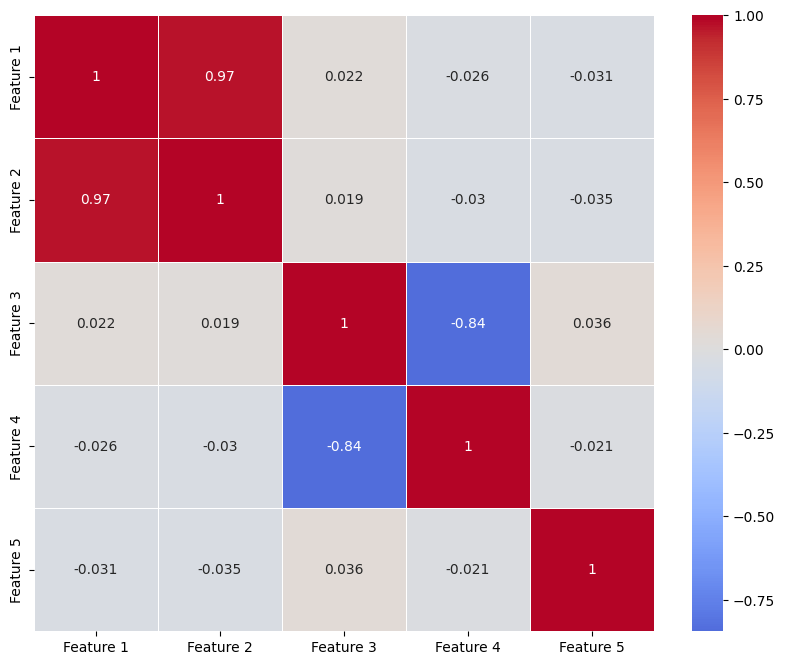

In [17]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, center=0)

In [18]:
# Identify highly correlated features (threshold set to 0.8)
threshold = 0.8
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((correlation_matrix.index[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the highly correlated feature pairs
high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df 

,Feature 1,Feature 2,Correlation
0,Feature 1,Feature 2,0.968504
1,Feature 3,Feature 4,-0.844147


### L1 (Lasso) regularization

Lasso = Least Absolute Shrinkage and Selection Operator

#### Regression

In [19]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression


# Synthetic regression dataset
X, y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=10,  # Only 10 out of 20 features are informative
    noise=0.1,
    random_state=42
)

feature_names = [f"{i}" for i in range(1, 21)]
df = pd.DataFrame(X, columns=feature_names)
# df["Target"] = y

In [20]:
# Fit a Lasso Regression model with L1 regularization
lasso = Lasso(alpha=0.1, random_state=42)  # alpha is the regularization parameter (λ)
lasso.fit(X, y);

In [21]:
# Extract the coefficients and identify important features
coefficients = pd.Series(lasso.coef_, index=feature_names)
selected_features = coefficients[coefficients != 0].index

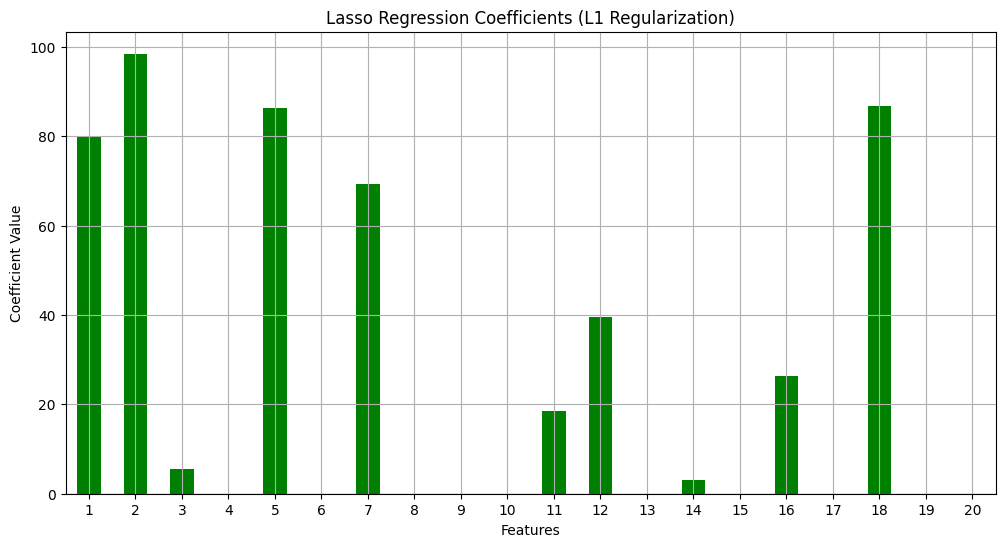

In [22]:
# Plot the coefficients
plt.figure(figsize=(12, 6))
coefficients.plot(kind="bar", color=["green" if coef != 0 else "red" for coef in coefficients])
plt.axhline(y=0, color='black', linewidth=0.8)
plt.title("Lasso Regression Coefficients (L1 Regularization)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=0)
plt.grid()

In [23]:
# Selected features with non-zero coefficients
selected_features_df = pd.DataFrame(coefficients[coefficients != 0], columns=["Coefficient"])
selected_features_df

,Coefficient
1,79.911836
2,98.476560
3,5.471737
5,86.353936
7,69.321375
11,18.496338
12,39.532836
14,2.980994
16,26.281064
18,86.783882


#### Classification

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,  # Only 10 features are informative
    n_redundant=5,
    n_clusters_per_class=2,
    random_state=42
)

In [26]:
log_reg_l1 = LogisticRegression(penalty='l1', solver='saga', C=1.0, max_iter=5000, random_state=42)
log_reg_l1.fit(X, y);

In [27]:
# Extract the coefficients and identify important features again
coefficients = pd.Series(log_reg_l1.coef_[0], index=[f"{i}" for i in range(1, 21)])
selected_features = coefficients[coefficients != 0].index

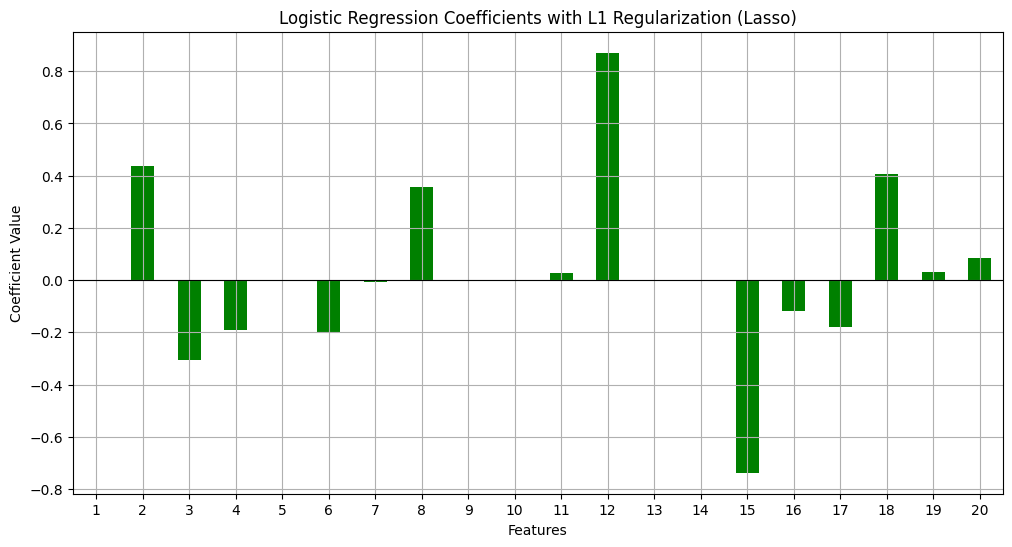

In [28]:
# Plot the updated coefficients
plt.figure(figsize=(12, 6))
coefficients.plot(kind="bar", color=["green" if coef != 0 else "red" for coef in coefficients])
plt.axhline(y=0, color='black', linewidth=0.8)
plt.title("Logistic Regression Coefficients with L1 Regularization (Lasso)")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=0)
plt.grid()

In [29]:
selected_features_df = pd.DataFrame(coefficients[coefficients != 0], columns=["Coefficient"])
selected_features_df

,Coefficient
2,0.438760
3,-0.306244
4,-0.189897
5,-0.000001
6,-0.201842
7,-0.007789
8,0.358528
11,0.027402
12,0.870923
15,-0.737521


### Feature importance

In [30]:
# Synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_clusters_per_class=2,
    random_state=42,
)

In [31]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_importance = dt_model.feature_importances_

In [33]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_importance = rf_model.feature_importances_

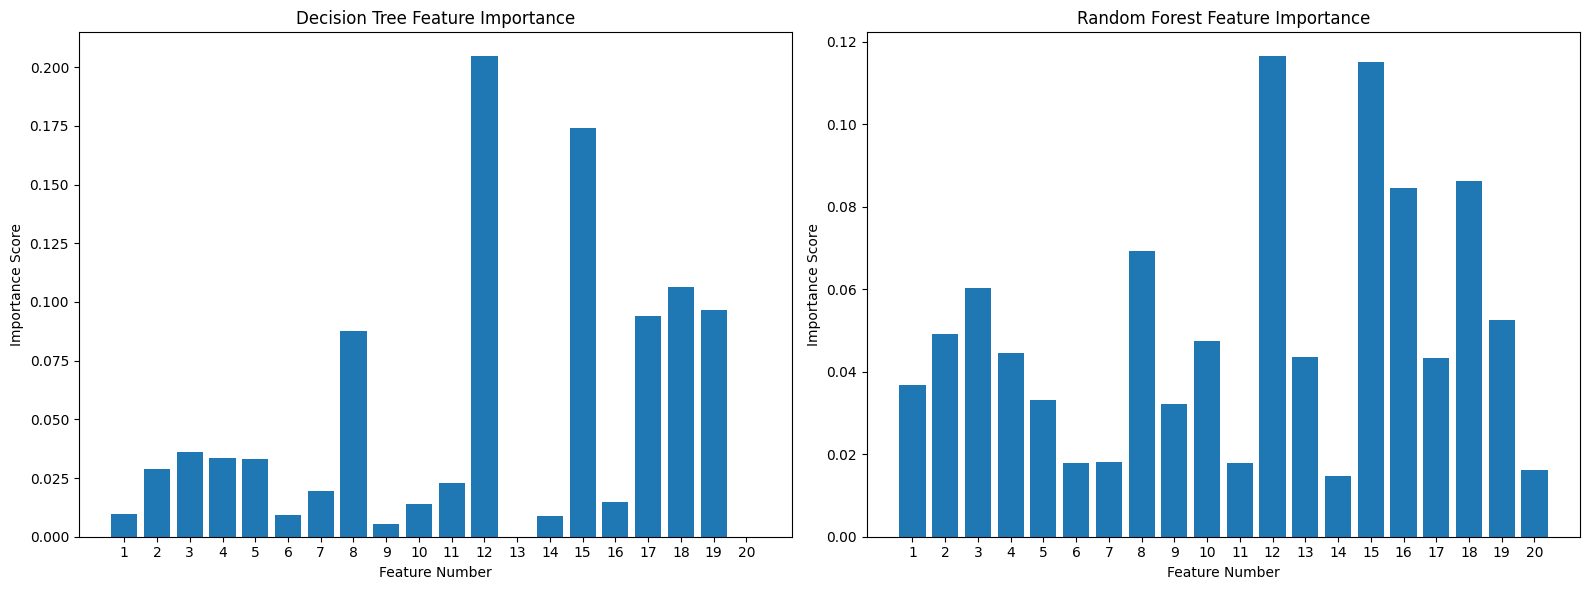

In [34]:
# Plot Decision Tree and Random Forest Feature Importance
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Decision Tree Feature Importance
axs[0].bar(range(1, len(dt_importance) + 1), dt_importance)
axs[0].set_title("Decision Tree Feature Importance")
axs[0].set_xlabel("Feature Number")
axs[0].set_ylabel("Importance Score")
axs[0].set_xticks(range(1, len(dt_importance) + 1))

# Random Forest Feature Importance
axs[1].bar(range(1, len(rf_importance) + 1), rf_importance)
axs[1].set_title("Random Forest Feature Importance")
axs[1].set_xlabel("Feature Number")
axs[1].set_ylabel("Importance Score")
axs[1].set_xticks(range(1, len(rf_importance) + 1))

plt.tight_layout()

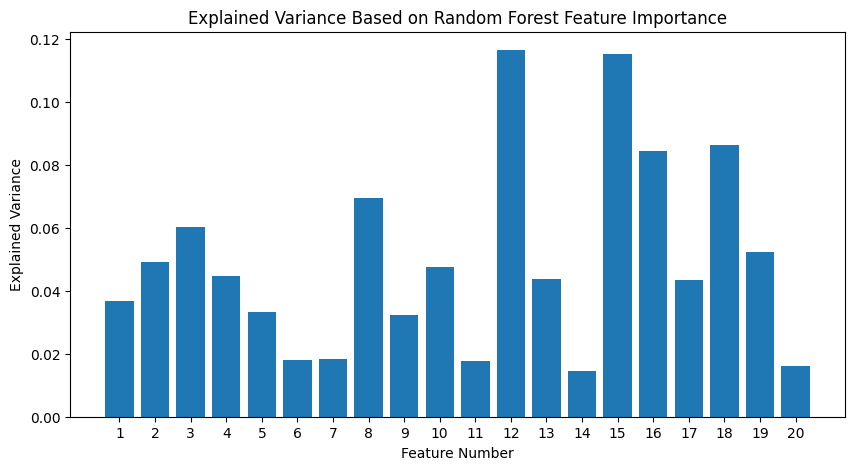

In [35]:
# Plot Explained Variance based on Random Forest Feature Importance
explained_variance = rf_importance / rf_importance.sum()

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title("Explained Variance Based on Random Forest Feature Importance")
plt.xlabel("Feature Number")
plt.ylabel("Explained Variance")
plt.xticks(range(1, len(explained_variance) + 1));

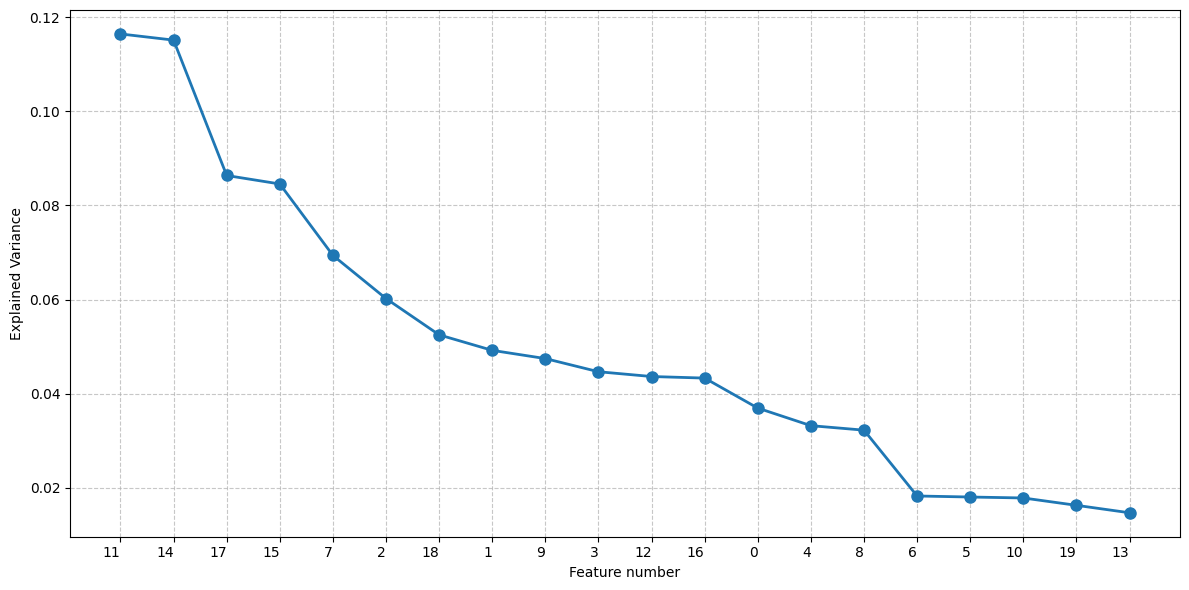

In [36]:
# Plot explained variances
sorted_indices = np.argsort(explained_variance)[::-1]
explained_variance_sorted = explained_variance[sorted_indices]

feature_labels = [f"{i}" for i in sorted_indices]

plt.figure(figsize=(12, 6))
plt.plot(
    explained_variance_sorted,
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=8,
)
plt.xticks(ticks=np.arange(len(feature_labels)), labels=feature_labels, rotation=0, ha='right')
plt.xlabel("Feature number")
plt.ylabel("Explained Variance")
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()


## Matrix factorization

### Principal Component Analysis (PCA)

In [37]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [38]:
# Synthetic dataset
np.random.seed(42)
n_samples = 1000
n_features = 10

# Correlated features
X = np.random.randn(n_samples, n_features)
X[:, 1] = X[:, 0] * 0.8 + np.random.randn(n_samples) * 0.1  # Correlated feature
X[:, 2] = X[:, 0] * -0.5 + np.random.randn(n_samples) * 0.1  # Correlated feature

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
# Apply PCA
pca = PCA(n_components=n_features)
X_pca = pca.fit_transform(X_scaled)

In [40]:
# Calculate explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

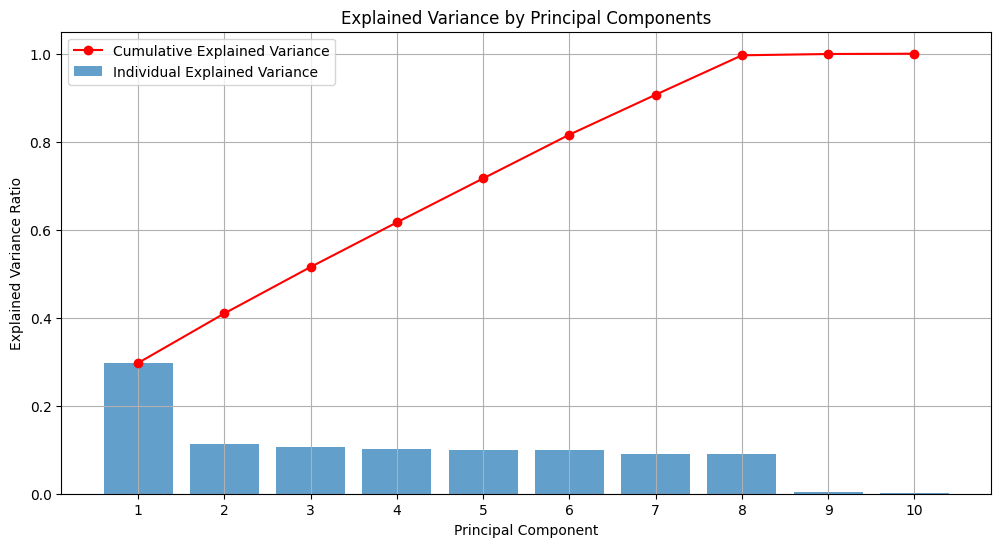

In [41]:
plt.figure(figsize=(12, 6))
plt.bar(range(1, n_features + 1), explained_variance_ratio, alpha=0.7, label="Individual Explained Variance")
plt.plot(range(1, n_features + 1), cumulative_explained_variance, marker='o', color='red', label="Cumulative Explained Variance")
plt.title("Explained Variance by Principal Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.xticks(range(1, n_features + 1))
plt.legend()
plt.grid()

In [42]:
explained_variance_df = pd.DataFrame({
    "Principal Component": [f"PC{i}" for i in range(1, n_features + 1)],
    "Explained Variance Ratio": explained_variance_ratio,
    "Cumulative Explained Variance": cumulative_explained_variance
})
explained_variance_df

,Principal Component,Explained Variance Ratio,Cumulative Explained Variance
0,PC1,0.297119,0.297119
1,PC2,0.112583,0.409703
2,PC3,0.105579,0.515282
3,PC4,0.101410,0.616692
4,PC5,0.099936,0.716628
5,PC6,0.099449,0.816077
6,PC7,0.090789,0.906866
7,PC8,0.089516,0.996381
8,PC9,0.002995,0.999377
9,PC10,0.000623,1.000000


## Manifold learning

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [43]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import TSNE

In [44]:
X, color = make_swiss_roll(n_samples=500, noise=0.1)

In [45]:
# Apply t-SNE with optimized parameters
tsne = TSNE(n_components=2, random_state=42, perplexity=100, max_iter=500)
X_embedded = tsne.fit_transform(X)

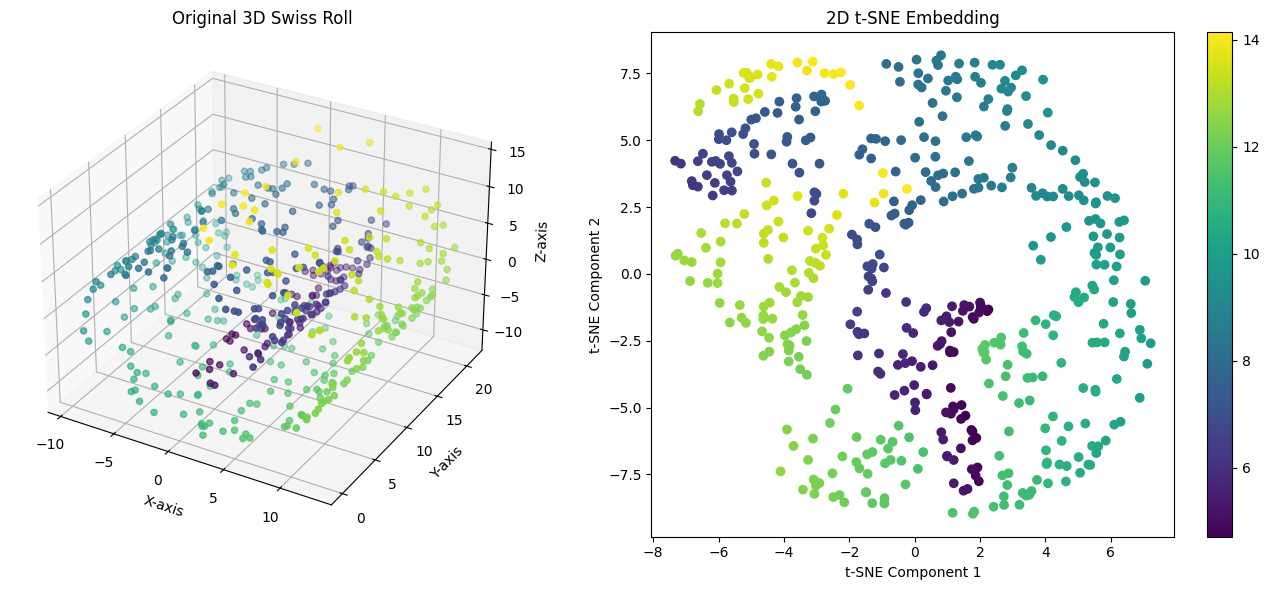

In [47]:
# Original 3D data and the 2D t-SNE result
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
scatter = ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap='viridis')
ax1.set_title("Original 3D Swiss Roll")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_zlabel("Z-axis")

ax2 = fig.add_subplot(122)
scatter = ax2.scatter(X_embedded[:, 0], X_embedded[:, 1], c=color, cmap='viridis')
ax2.set_title("2D t-SNE Embedding")
ax2.set_xlabel("t-SNE Component 1")
ax2.set_ylabel("t-SNE Component 2")

plt.colorbar(scatter, ax=ax2)
plt.tight_layout();